In [101]:
# Import our modules
import pandas as pd 
import numpy as np
import scipy
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Pull data from the csv
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
# Check the number of rows in the dataset
index = heart_data.index
print(len(index))

303


There are 14 attributes for 303 individuals in this data set. The last attribute, "target", indicates whether or not an individual has heart disease. The remaining attributes are listed below as continuous or categorical, based on the documentation in the original Kaggle dataset. I am renaming the variables as needed (indicated by a fire emoji 🔥 ) for ease of recognition as I explore the data.

The following attributes are numerical and continuous:

 - __age__
 - __trestbps__ (resting blood pressure in mm Hg on admission to the hospital) 🔥 __rest_bp__
 - __chol__ (serum cholestoral in mg/dl)
 - __thalach__ (maximum heart rate achieved) 🔥 __max_hr__
 - __oldpeak__ (ST depression induced by exercise relative to rest) 🔥 __st_dep__

The following attributes are categorical:

 - __sex__ (1, 0): 1 = male, 0 = female
 - __cp__ (0 for no chest pain or 1-4 for different types of chest pain. 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain and 4 = asymptomatic) 🔥 __chest_pain__
 - __fbs__ (1 = fasting blood sugar > 120 mg/dl = 1; 0 = fbs <= 120 mg/dl) 🔥 __blood_sugar__
 - __restecg__ (resting electrocardiographic results, 0 - 2: 0 = probable left ventricular hypertrophy, 1 = normal, and 2 = abnormalities in the T wave or ST segment) 🔥 __rest_ecg__
 - __exang__ (exercise induced angina, 1 = yes; 0 = no) 🔥 __ex_angina__
 - __thal__ (1 = normal blood flow; 2 = fixed defect -- no blood flow in some part of the heart; 3 = reversable defect -- abnormal blood flow observed) 🔥 __heart_defect__ 
 - __slope__ (the slope of the peak exercise ST segment: 1 = upsloping, 2 = flat, 3 = downsloping)
 - __ca__ (number of major vessels, 0-4, colored by flourosopy) 🔥 __major_vessels__
 - __target__ (heart disease, 0 = yes and 1 = no) 🔥 __heart_disease__


In [103]:
# Set seed for reproducibility
np.random.seed(0)

## Rename Variables

In [104]:
# Rename the variables for ease of reference 

heart_data.columns = ['age', 'sex', 'chest_pain', 'rest_bp', 'chol', 'blood_sugar', 'rest_ecg', 'max_hr',
                      'ex_angina', 'st_dep', 'slope', 'major_vessels', 'heart_defect','heart_disease']

## Check for Missing Values

In [105]:
# Find missing value counts in each column
heart_missing_values = heart_data.isnull().sum()

# Find how many values are missing in our columns
heart_missing_values[0:13]

age              0
sex              0
chest_pain       0
rest_bp          0
chol             0
blood_sugar      0
rest_ecg         0
max_hr           0
ex_angina        0
st_dep           0
slope            0
major_vessels    0
heart_defect     0
dtype: int64

We do not appear to have any missing values, and all of the data types are int64.

## Check for Duplicate Values

Because the data are all continuous and categorical and there are no unique values like subject IDs, we expect there will be duplicate values in all of the categorical fields and some duplicates in the continuous variables. We can take a look at the duplicates in the age column out of curiousity.

In [106]:
heart_data.duplicated(subset=['age'])

0      False
1      False
2      False
3      False
4      False
       ...  
298     True
299     True
300     True
301     True
302     True
Length: 303, dtype: bool

This makes sense; the first 5 rows come back as "False" because those numbers have not yet been repeated. By the end of the dataset, each individual's age has already appeared in the column.

## View Histograms of Each Variable

This will give us an idea of the range and distribution of each numerical variable before we consider removing outliers.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'rest_bp'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'blood_sugar'}>,
        <AxesSubplot:title={'center':'rest_ecg'}>,
        <AxesSubplot:title={'center':'max_hr'}>],
       [<AxesSubplot:title={'center':'ex_angina'}>,
        <AxesSubplot:title={'center':'st_dep'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'major_vessels'}>],
       [<AxesSubplot:title={'center':'heart_defect'}>,
        <AxesSubplot:title={'center':'heart_disease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

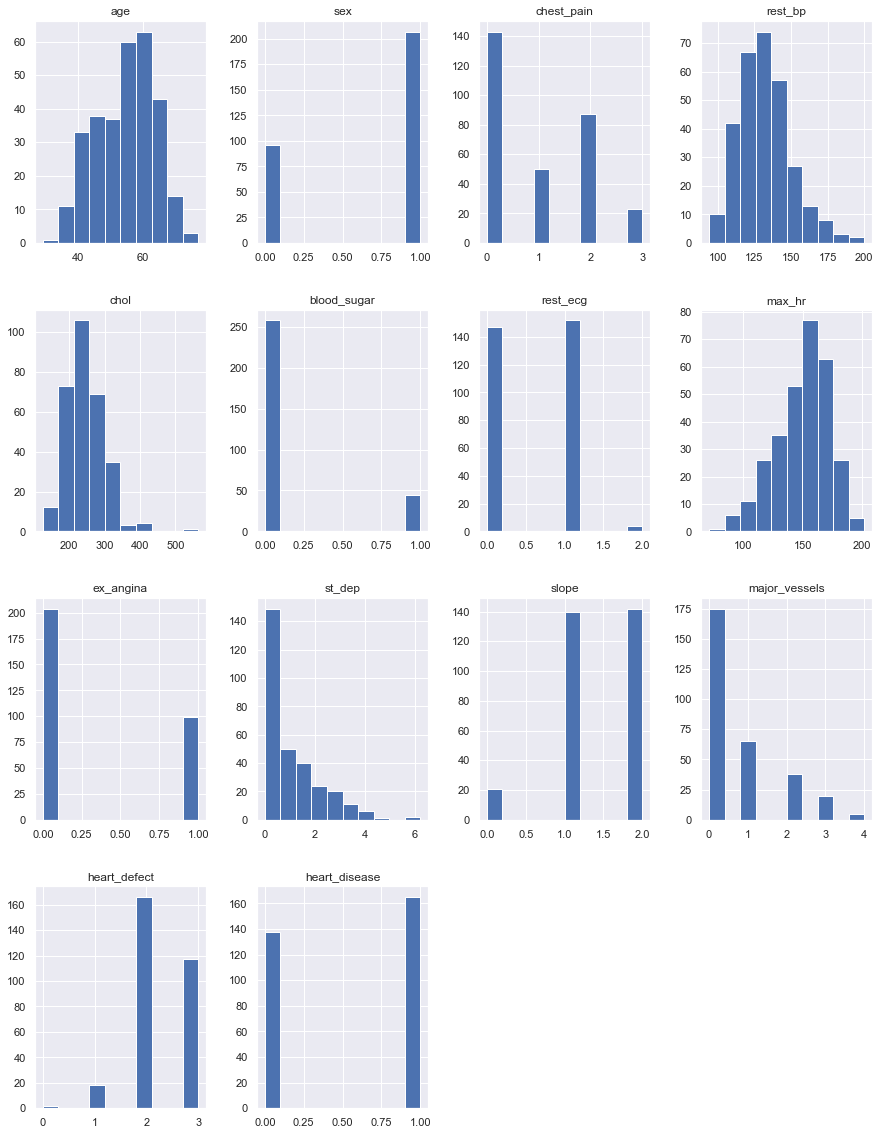

In [107]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)

# Check Descriptive Statistics

In [108]:
heart_data.describe()

,age,sex,chest_pain,rest_bp,chol,blood_sugar,rest_ecg,max_hr,ex_angina,st_dep,slope,major_vessels,heart_defect,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Remove Outliers

Based on the histograms and descriptive statistics, it makes the most sense to check our __cholesterol__ and __st_dep__ (ST depression) variables for outliers and remove those that appear to be skewing the data. The histograms for both cholesterol and st_dep are strongly skewed to the right and have maximums more than two standard deviations greater than the means. Also, based on common sense, a cholesterol value of 564 seems extremely high. 

When it comes to __categorical__ variables, I'm going to check the literature for the values of rest_ecg (resting electrocardiographic results), major_vessels and blood_flow to see if it makes sense to have such a small number of values in each category (2, 4 and 0, respectively).

 - __rest_ecg__: because a value of 2 indicates abnormalities in the T wave or ST segment, it makes sense that there are not many of these values measured
 - __major_vessels__: 4 represents a null value that was dropped previously from the dataset.
 - __heart_defect__: 0 represents a null value that was dropped previously from the dataset
 
Because the latter two null values are categorical and because ~5 examples have those missing values, I will simply drop them from the dataset after dealing with outliers in the continuous data.

In [109]:
# Remove outliers from cholesterol (4 outliers) -- I could edit this to just remove outliers greater than 500
heart_data = heart_data[(np.abs(stats.zscore(heart_data['chol'])) < 3)]

index = heart_data.index
print(len(index))

# Remove outliers from oldpeak (2 outliers)
heart_data = heart_data[(np.abs(stats.zscore(heart_data['st_dep'])) < 3)]

index = heart_data.index
print(len(index))

# Note to self: if I run this cell multiple times it will continue removing rows from the dataset because the zscore will change each time.

299
297


In [110]:
# Remove outliers based on the missing values for major_vessels (value = 4) and blood_flow (value = 0) 

indexNames = heart_data[heart_data['major_vessels'] == 4].index
heart_data.drop(indexNames, inplace = True)

index = heart_data.index
print(len(index)) # there were 5 missing values for major_vessels and those rows have been dropped

indexNames = heart_data[heart_data['heart_defect'] == 0].index
heart_data.drop(indexNames, inplace = True)

print(len(heart_data.index)) # the 2 missing values for heart_defect have been dropped


292
290


We can now check the histograms and descriptive statistics again to see if the skew remains in those variables.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'rest_bp'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'blood_sugar'}>,
        <AxesSubplot:title={'center':'rest_ecg'}>,
        <AxesSubplot:title={'center':'max_hr'}>],
       [<AxesSubplot:title={'center':'ex_angina'}>,
        <AxesSubplot:title={'center':'st_dep'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'major_vessels'}>],
       [<AxesSubplot:title={'center':'heart_defect'}>,
        <AxesSubplot:title={'center':'heart_disease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

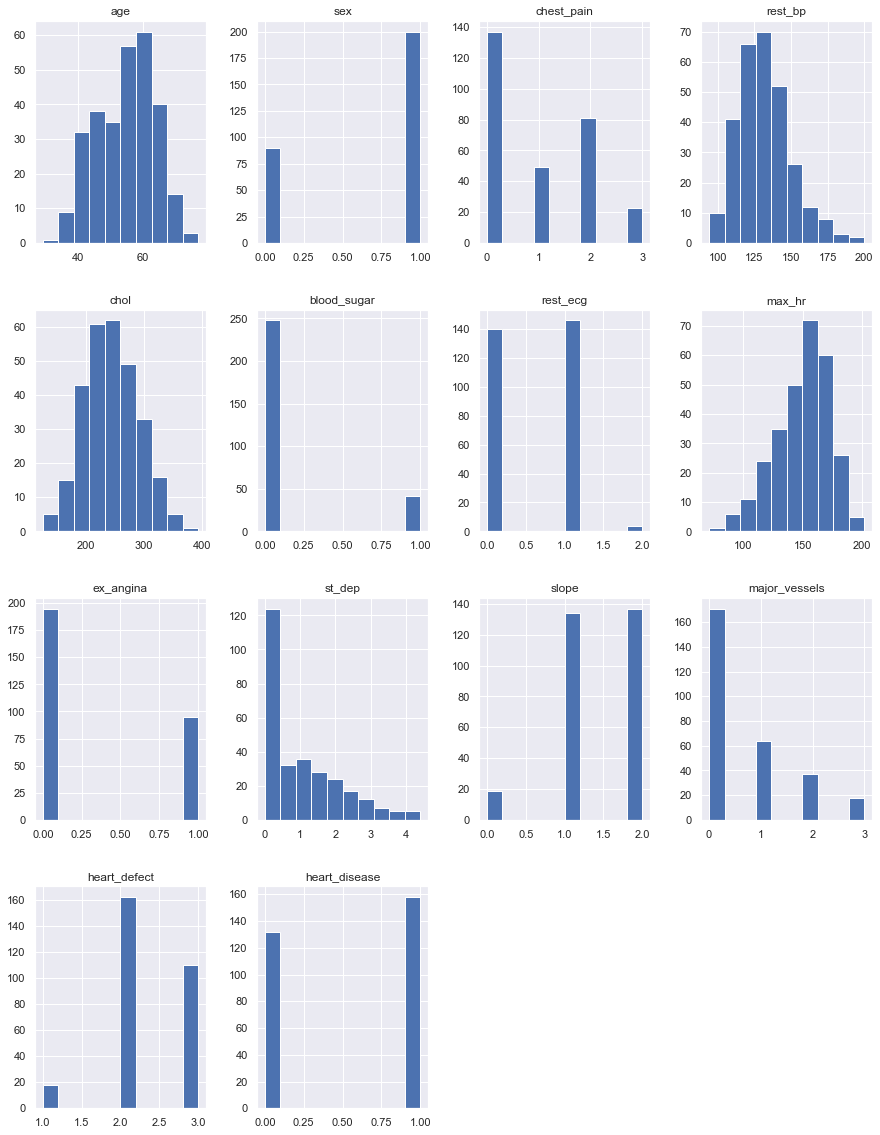

In [111]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)

In [112]:
heart_data.describe()

,age,sex,chest_pain,rest_bp,chol,blood_sugar,rest_ecg,max_hr,ex_angina,st_dep,slope,major_vessels,heart_defect,heart_disease
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,54.382759,0.689655,0.965517,131.434483,244.758621,0.144828,0.531034,149.631034,0.327586,1.011724,1.406897,0.662069,2.317241,0.544828
std,9.076856,0.463434,1.035119,17.756840,45.810770,0.352535,0.526859,23.081436,0.470144,1.090982,0.611273,0.924265,0.584736,0.498847
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


While st_dep still has a strong right skew, cholesterol now has a more normal distribution. The rows with missing categorical values (7) have also been removed. I will feel more comfortable normalizing these features when building a model.

# Examine Relationships between Initial Variables and Target

I will look at heat maps and correlations to examine the relationship between different features and the target. If features appear to be strongly correlated with one another, that is useful to know for the purposes of feature engineering. 

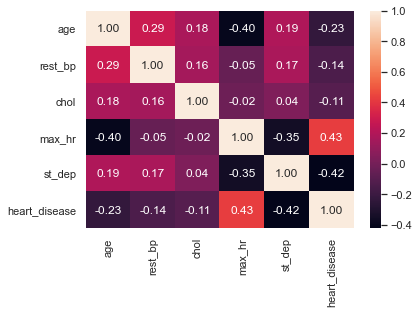

In [113]:
# Heat map of continuous variables and their relationship to the target, heart disease

list1 = ["age", "rest_bp", "chol", "max_hr", "st_dep", "heart_disease"]
sns.heatmap(heart_data[list1].corr(), annot = True, fmt = ".2f")
plt.show()

## Heat Map Observations for Continuous Variables
 - __Age__, __resting blood pressure__ and __cholesterol__ appear to have slight positive correlations (0.23, 0.13 and 0.11, respectively, because heart disease is 0 instead of 1) to an individual having heart disease. 
 - __ST depression__ appears to have a moderate positive correlation (0.42) to having heart disease.
 - __Maximum heart rate achieved__ appears to have a moderate negative correlation (-0.43) to having heart disease. We can see that max heart rate is negatively correlated with age (-0.40), as well - as people age, their heart rates tend to get slower.

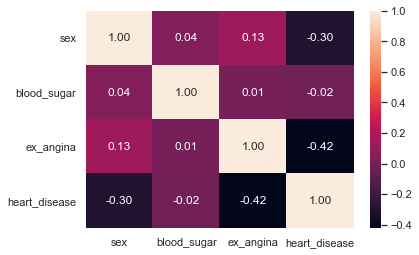

In [114]:
# Heat map of binary categorical variables and their relationship to target

list2 = ["sex", "blood_sugar", "ex_angina", "heart_disease"]
sns.heatmap(heart_data[list2].corr(), annot = True, fmt = ".2f")
plt.show()

## Heat Map Observations for Binary Variables

 - __Sex__ and __exercise-induced angina__ (chest pain) have moderate positive correlations with heart disease (0.30 and 0.44, respectively). In this sample, being a man is more highly correlated with heart disease than being a woman.
 - Fasting blood sugar above 120 mg/dl __(blood_sugar)__ does not appear to have a notable correlation with heart disease (-0.04).

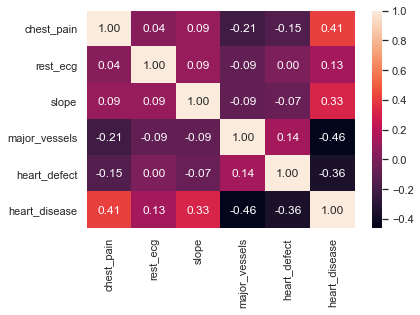

In [115]:
# Heat map of other categorical variables and their relationship to target

list3 = ["chest_pain", "rest_ecg", "slope", "major_vessels", "heart_defect", "heart_disease"]
sns.heatmap(heart_data[list3].corr(), annot = True, fmt = ".2f")
plt.show()

## Heat Map Observations for Other Categorical Variables

Because some of these variables are ordinal and some are not, it's important to make that distinction when looking for useful correlations. It may be that combining the data in different ways would result in more meaningful correlations.

 - __Heart_defect__ and __major_vessels__ have moderate to moderately strong positive correlations with heart disease (0.36 and 0.46, respectively). Higher values for __heart_defect__ (1 or 2) indicate that blood has stopped flowing to part of the heart (1) or is flowing abnormally (2), so this makes sense. Based on some research, __major_vessels__ appears to be related to the number of major heart vessels identified by the flourosopy procedure. While I'm not sure what that means, exactly (the medical articles I've found indicate that it's important but don't go into great detail on the actual procedure), it seems to be some kind of indication of abnormality or constriction of those vessels. It would make sense, then, that having a higher number of them would be correlated with heart disease.
 - __Slope__ and __chest_pain__ have moderate negative correlations to heart disease (-0.33 and -0.41). When we revisit the __chest_pain__ values, this makes sense (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain and 4 = asymptomatic). The higher values indicate other pain (3) and asymptomatic (4), although 0 indicates no pain. _Do some more research on slope._
 - __Rest_ecg__ has a slight negative correlation to heart disease (-0.13).

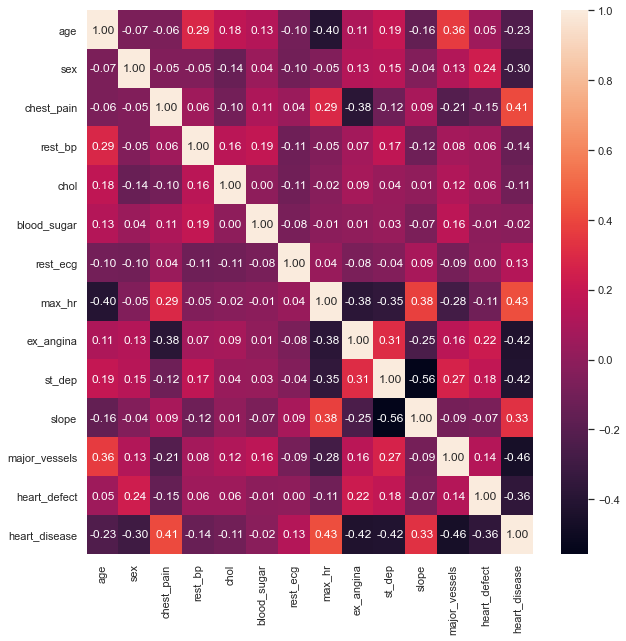

In [116]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(heart_data.corr(), annot = True, fmt = ".2f")
plt.show()

## Observations of Variable-to-Variable Correlations

It helps to see all variables in one place to get a sense of how they relate to one another in addition to how they relate to __heart_disease__. It's clear that feelings of chest pain will be important in this model, based on the correlations between __chest_pain__ and __ex_angina__ and __heart_disease__. We can refer back to this overall chart for more observations moving forward.

## Chi-Square Tests for Binary Variables (Optional)

In [117]:
# Chi-square tests for each binary relationship

# I will need the counts in each category for this

# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)

## Histograms of Continuous Variables and Heart Disease

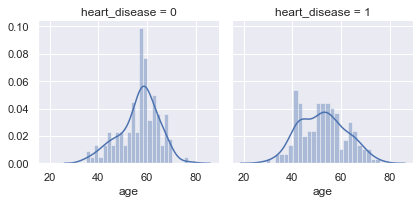

In [128]:
# Distributions of age and whether or not someone has heart disease (0 = yes, 1 = no)

g = sns.FacetGrid(heart_data, col = "heart_disease")
g.map(sns.distplot, "age", bins = 25)

plt.show()

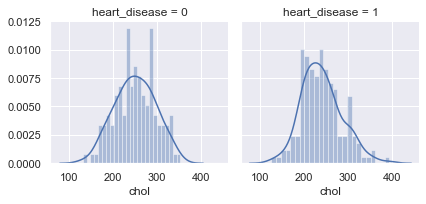

In [119]:
# Distributions of cholesterol and whether or not someone has heart disease (0 = yes, 1 = no)

g = sns.FacetGrid(heart_data, col = "heart_disease")
g.map(sns.distplot, "chol", bins = 25)
plt.show()

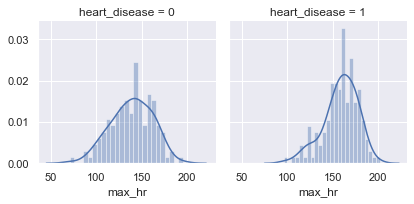

In [129]:
# Distributions of max heart rate and whether or not someone has heart disease (0 = yes, 1 = no)

g = sns.FacetGrid(heart_data, col = "heart_disease")
g.map(sns.distplot, "max_hr", bins = 25)
plt.show()

The histogram of those who do have heart disease (where heart_disease = 0) has a large peak around 60, while the histogram of those who do not has a smoother distribution.

## Bar Plots and Counts of Categorical Variables

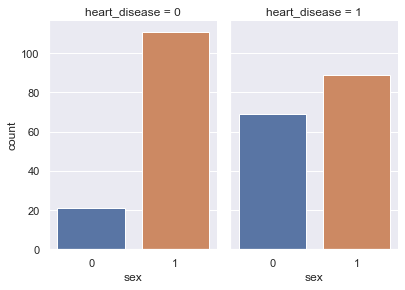

In [136]:
# Count plots of sex and whether or not someone has heart disease (0 = yes, 1 = no)

ax = sns.catplot(x="sex", col="heart_disease",
                data=heart_data, kind="count",
                height=4, aspect=.7)


This count plot bears out the correlation observed. There is a higher incidence of heart disease in men (sex = 1) than in women (sex = 0) in this sample.

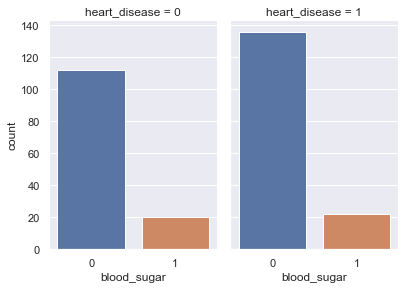

In [138]:
# Count plots of fasting blood sugar (1 = fbs > 120 mg/dl) and whether or not someone has heart disease (0 = yes, 1 = no)

ax = sns.catplot(x="blood_sugar", col="heart_disease",
                data=heart_data, kind="count",
                height=4, aspect=.7)

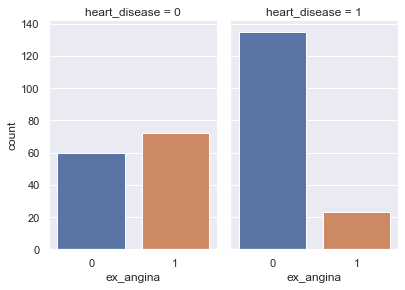

In [139]:
# Count plots of exercise induced angina (1 = yes) and whether or not someone has heart disease (0 = yes, 1 = no)

ax = sns.catplot(x="ex_angina", col="heart_disease",
                data=heart_data, kind="count",
                height=4, aspect=.7)

People who have exercise-induced angina appear more likely to have heart disease (heart disease = 0).

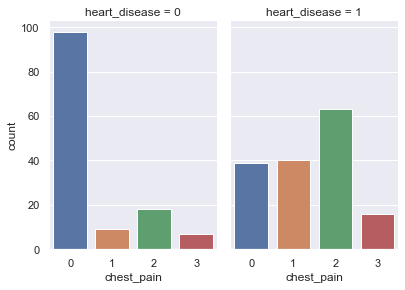

In [140]:
# Count plots of types of chest pain (0 = none, 3 = atypical) and whether or not someone has heart disease (0 = yes, 1 = no)

ax = sns.catplot(x="chest_pain", col="heart_disease",
                data=heart_data, kind="count",
                height=4, aspect=.7)

This plot is interesting because more people with chest pain do NOT have heart disease than do have heart disease. This does match up with the observed negative correlation between __chest_pain__ and heart disease.

## Next Steps:

I'd like to explore the variables more with various graphs and chi square tests. For now, I plan to move on to creating a model.